In [10]:
import pandas as pd
import numpy as np
import io
import os
import re
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from datetime import datetime
import json

In [11]:
class file_TGA:
    
    def read_file(self, path, filename):
        names_dictionary = {'3':['time', 'temperature', 'weight'], '4':['time', 'temperature', 'weight', 'derivative']}
        self.filename = filename
        method = ''
        skiprows = 0
        # try unicode encoding
        with open(path + filename, encoding='utf-16le') as f_in:
            lines = f_in.readlines()
            for line in lines:
                if line.find('Size') != -1:
                    self.sample_mass = re.findall('[0-9]+\.[0-9]+', line)[0]
                if line.find('Nsig') != -1:
                    self.nsig = re.findall('[0-9]+', line)[0]
                if (line.find('Instrument') != -1)&(line.find('TGA') != -1):
                    self.instrument = line[line.find('TGA'):]
                if line.find('OrgMethod') != -1:
                    method = method + line
                skiprows = skiprows + 1
                if line.find('OrgFile') != -1:
                    break
        #print(skiprows)
        if skiprows!= 1:
            self.data = pd.read_csv(path + filename, 
                                    names = names_dictionary[self.nsig],
                                    skiprows=skiprows+2, 
                                    sep='\s+', 
                                    encoding='utf-16le')
        else:
            method = ''
            skiprows = 0
            # try windows
            with open(path + filename, encoding='iso-8859-1') as f_in:
                lines = f_in.readlines()
                for line in lines:
                    if line.find('Size') != -1:
                        self.sample_mass = re.findall('[0-9]+\.[0-9]+', line)[0]
                    if line.find('Nsig') != -1:
                        self.nsig = re.findall('[0-9]+', line)[0]
                    if (line.find('Instrument') != -1)&(line.find('TGA') != -1):
                        self.instrument = line[line.find('TGA'):]
                    if line.find('OrgMethod') != -1:
                        method = method + line
                    skiprows = skiprows + 1
                    if line.find('OrgFile') != -1:
                        break
            #print(skiprows)
            if skiprows!= 1:
                self.data = pd.read_csv(path + filename, 
                                    names = names_dictionary[self.nsig],
                                    skiprows=skiprows+2, 
                                    sep='\s+', 
                                    encoding='iso-8859-1')
        
        self.method = method
        #print(self.data.head())
        # test if import was correct
        if (list(self.__dict__.keys()) == ['filename', 'instrument', 'sample_mass', 'nsig', 'data', 'method'])  & (not self.data.empty):
            print('File {0} read succesfull'.format(filename))
            self.import_success = True
        else:
            self.import_success = False

            


File 20190326_Syloid-AL-1_TGA_5Cmin.txt read succesfull


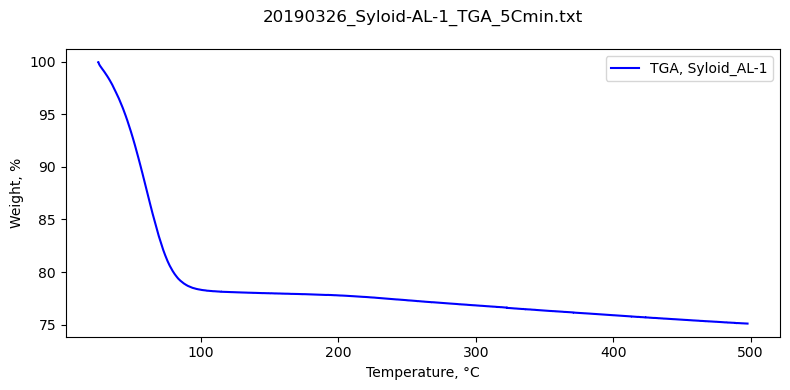

File 20190224_CAU-10_TGA_5Cmin.txt read succesfull


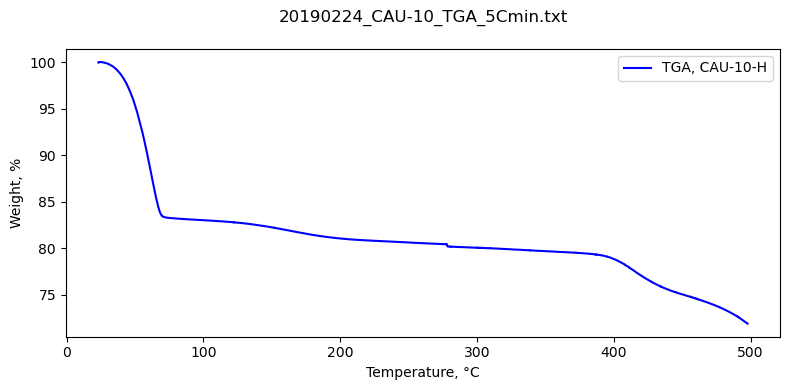

File SS-2-1232.txt read succesfull


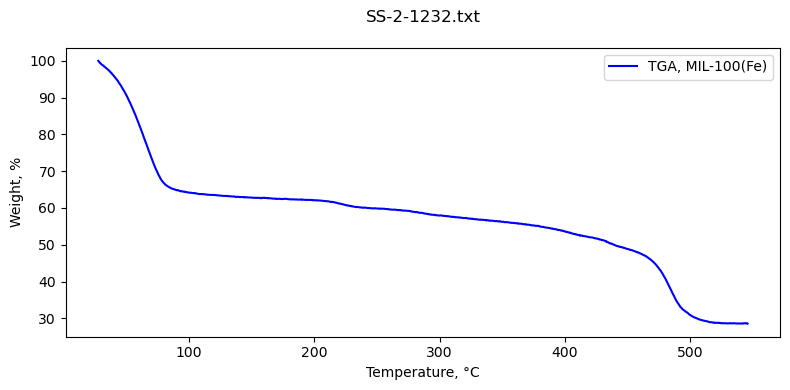

File 20190412_AlOHFumarate_Naveen.txt read succesfull


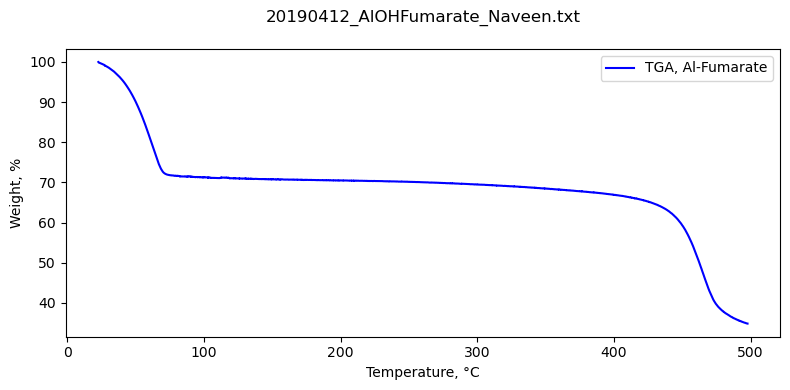

File MIL-160_AS_DJ2500.001.txt read succesfull


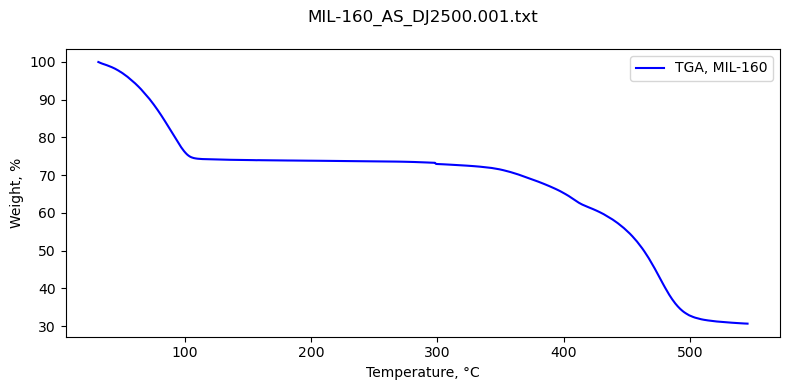

File SS-1131-MOF-303.txt read succesfull


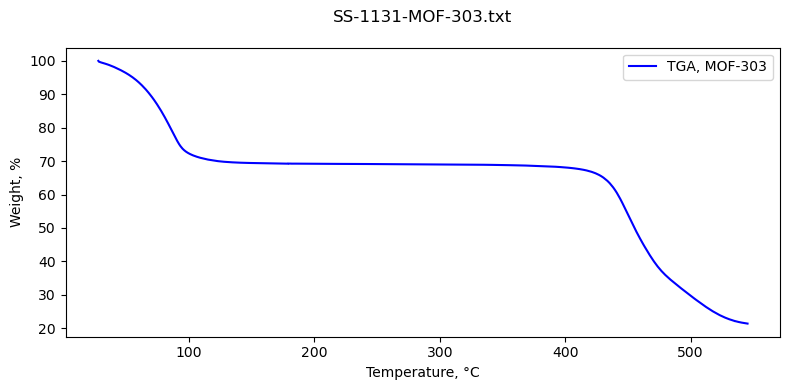

File ROS-037_26092019.txt read succesfull


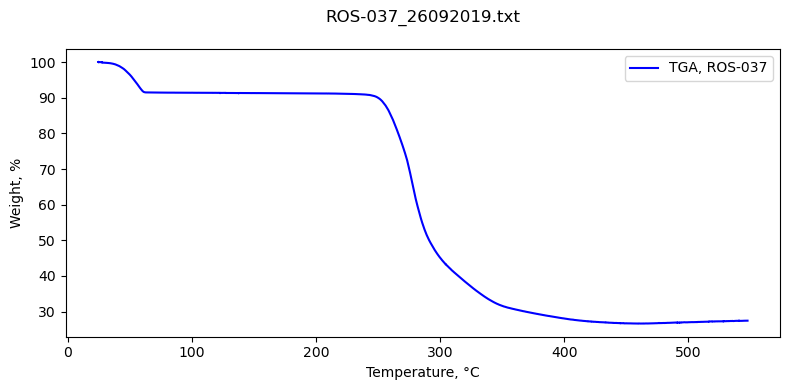

File SD-1-82.002.txt read succesfull


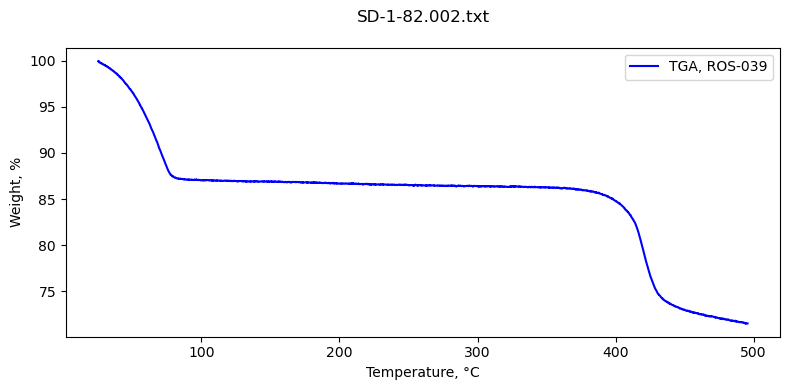

File SD-1-183.txt read succesfull


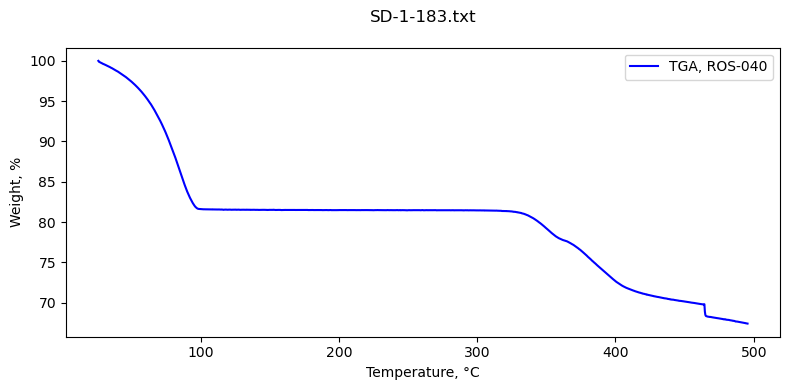

File AAB_3_96.txt read succesfull


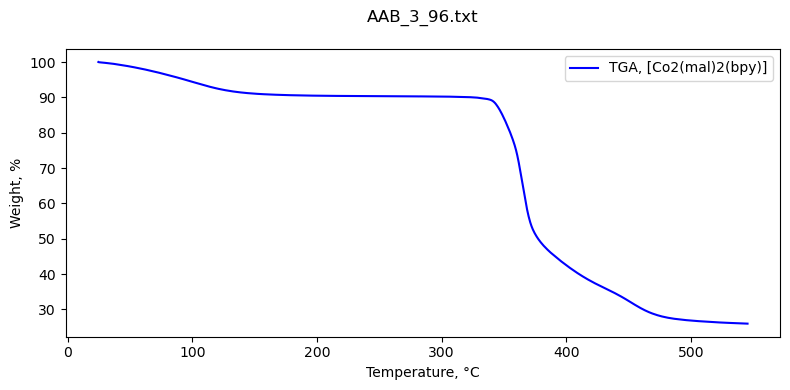

File AAB-3-107.txt read succesfull


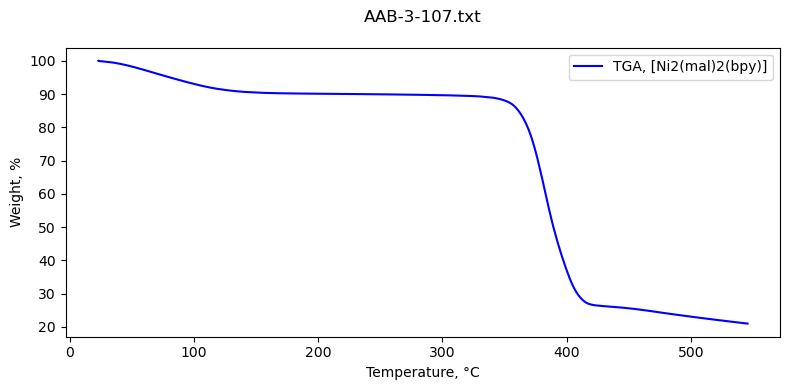

File AAB_3_03_gr.txt read succesfull


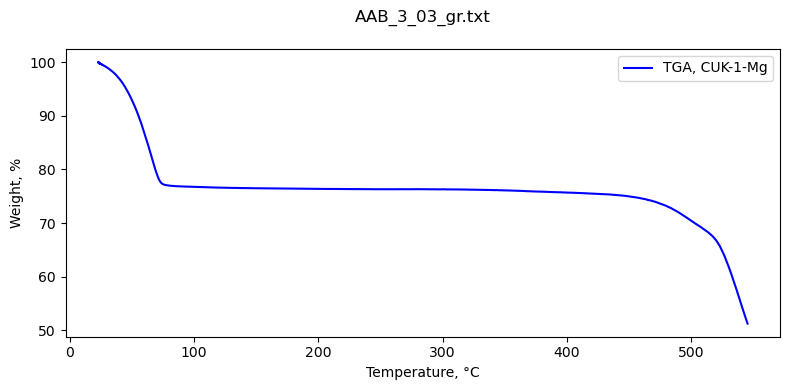

File AAB_2_108_wwH2O.txt read succesfull


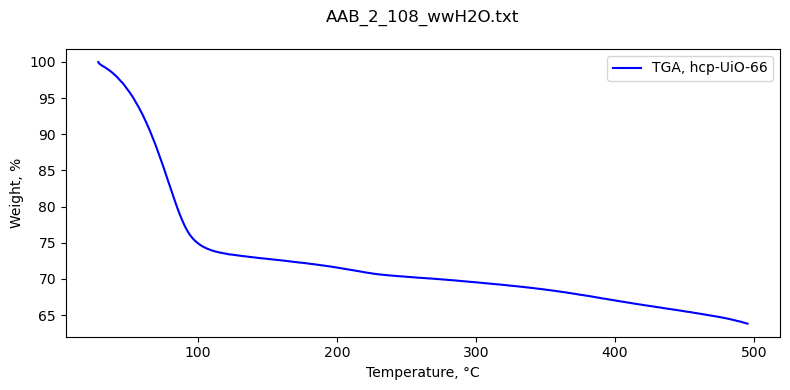

File AAB-3-103.txt read succesfull


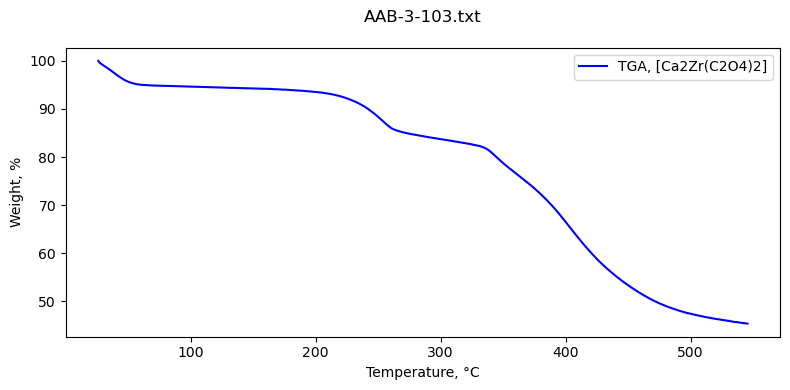

File AAB-6-42.txt read succesfull


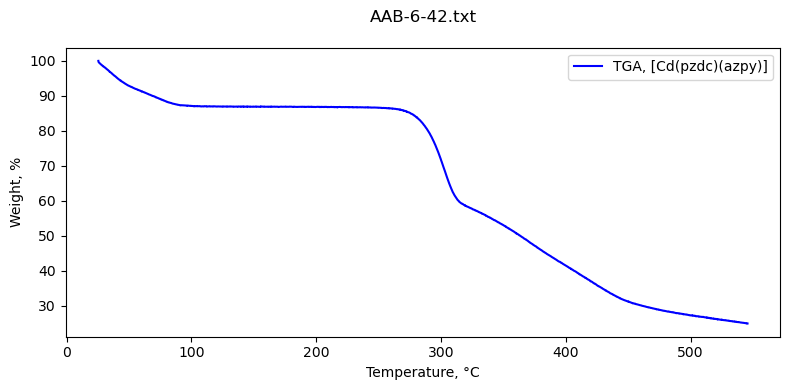

File AAB-6-41.txt read succesfull


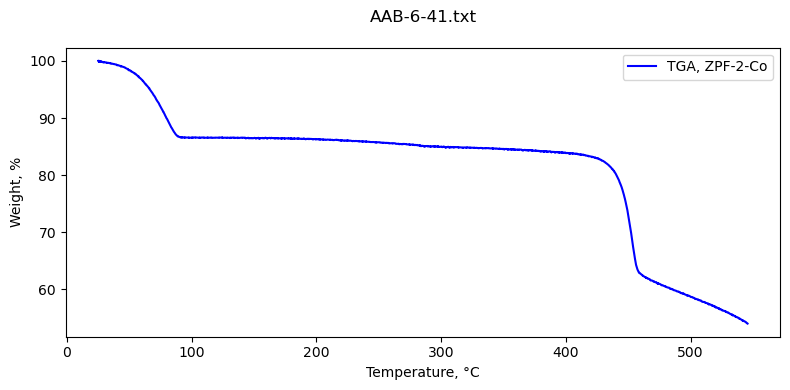

File AAB-6-35.txt read succesfull


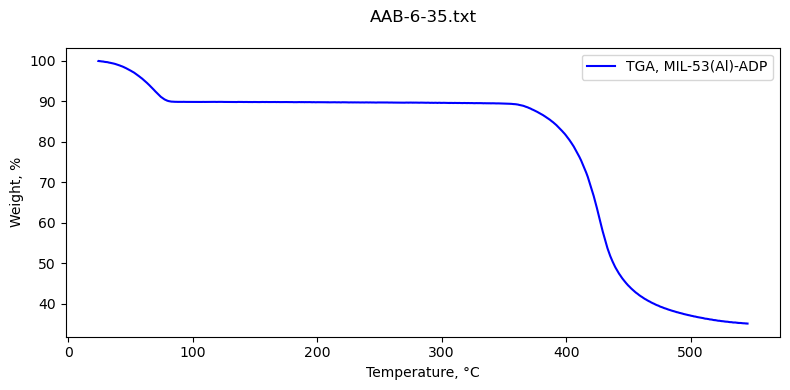

File AAB-6-40_refluxEtOH.txt read succesfull


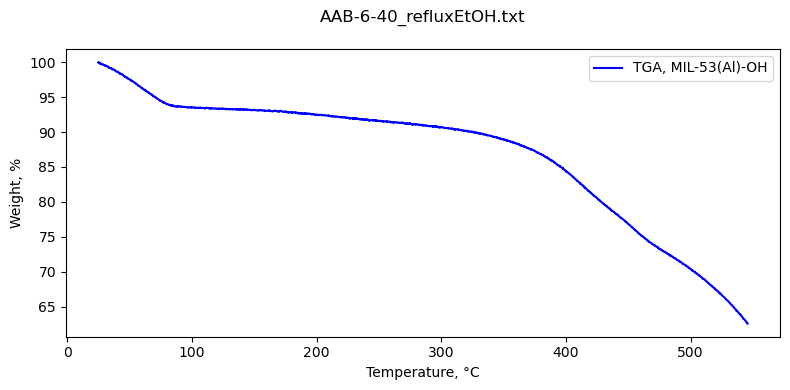

In [12]:
##################################################
####### main 
##################################################
filelist =  {'Syloid_AL-1':{'TGA':'20190326_Syloid-AL-1_TGA_5Cmin.txt',
                       },
             'CAU-10-H':{'TGA':'20190224_CAU-10_TGA_5Cmin.txt',
                       },
             'MIL-100(Fe)':{'TGA':'SS-2-1232.txt',
                       },
             'Al-Fumarate':{'TGA':'20190412_AlOHFumarate_Naveen.txt',
                       },
             'MIL-160':{'TGA':'MIL-160_AS_DJ2500.001.txt',
                       },
             'MOF-303':{'TGA':'SS-1131-MOF-303.txt',
                       },
             'ROS-037':{'TGA':'ROS-037_26092019.txt',
                       },
             'ROS-039':{'TGA':'SD-1-82.002.txt',
                       },
             'ROS-040':{'TGA':'SD-1-183.txt',
                       },
             '[Co2(mal)2(bpy)]':{'TGA':'AAB_3_96.txt',
                       },
             '[Ni2(mal)2(bpy)]':{'TGA':'AAB-3-107.txt',
                       },
             'CUK-1-Mg':{'TGA':'AAB_3_03_gr.txt',
                       },
             'hcp-UiO-66':{'TGA':'AAB_2_108_wwH2O.txt',
                       },
             '[Ca2Zr(C2O4)2]':{'TGA':'AAB-3-103.txt',
                       },
             '[Cd(pzdc)(azpy)]':{'TGA':'AAB-6-42.txt',
                       },
             'ZPF-2-Co':{'TGA':'AAB-6-41.txt',
                       },
             'MIL-53(Al)-ADP':{'TGA':'AAB-6-35.txt',
                       },
             'MIL-53(Al)-OH':{'TGA':'AAB-6-40_refluxEtOH.txt',
                       },
                  
             }

text_size = 16
path = '../../../../data/material_characterization/TGA/'
for material_name in filelist.keys():
    ### import experimental  ###
    TGA = file_TGA()
    try:
        TGA.read_file(path + '/', filelist[material_name]['TGA'])
        if not TGA.import_success:
            del TGA
            print(material_name, 'failed')
    except Exception as e:
        print(e)
        print(material_name, 'failed')
        
    
    fig = plt.figure(figsize=(8,8*0.5))
    df = TGA.data
    plt.plot(df.temperature, 
             TGA.data.weight/float(TGA.sample_mass)*100, 
             label='TGA, '+material_name, c='b')
    plt.xlabel('Temperature, °C')
    plt.ylabel('Weight, %')
    plt.title(TGA.filename+'\n')
    plt.legend()
    fig.tight_layout()
    plt.savefig(material_name+'_'+TGA.filename+'.png', dpi=300)
    plt.show()
    